Sentiment Analysis For Financial News

In [15]:
!pip install kagglehub

In [16]:
import kagglehub

path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/sentiment-analysis-for-financial-news


So I have already downloaded the datasets from Kaggle directly from Colab instead of the downloading the archive

Load & Analyze the Dataset with Sentiment Scoring

In [17]:
# loading the data
import pandas as pd
import os

file_path = "/root/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5/all-data.csv"

df = pd.read_csv(file_path, encoding='latin-1', names=['Sentiment', 'News'])
df.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [18]:
import os

file_path = "/root/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5"
os.listdir(file_path)

['all-data.csv', 'FinancialPhraseBank']

In [19]:
df.isnull().sum()

,0
Sentiment,0
News,0


In [20]:
df.describe()

,Sentiment,News
count,4846,4846
unique,3,4838
top,neutral,TELECOMWORLDWIRE-7 April 2006-TJ Group Plc sel...
freq,2879,2


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4846 non-null   object
 1   News       4846 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


In [22]:
df.tail()

,Sentiment,News
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...
4845,negative,Sales in Finland decreased by 10.5 % in Januar...


In [23]:
df

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


Preparing the Data

In [24]:
df.dropna(inplace=True)
# any rows with missing data in case

In [25]:
df['News'] = df['News'].astype(str)

For example
a column with mixed types (e.g. numbers, NaN, or strings).

to ensure everything in that column is a string before processing text (like cleaning or using NLP).

Example:
python
Copy code
import pandas as pd

df = pd.DataFrame({
    'News': [123, 'Hello', None]
})

df['News'] = df['News'].astype(str)

print(df)

In [26]:
df['Sentiment'].value_counts()

,count
Sentiment,
neutral,2879
positive,1363
negative,604


Sentiment Analysis Tool

VADER Sentiment Scores" usually refers to using the VADER (Valence Aware Dictionary and sEntiment Reasoner) sentiment analysis tool to calculate sentiment scores (positive, negative, neutral, and compound) for text data — often in a column like 'News'.


What VADER adds:
For each text entry (like a news headline or sentence), VADER returns:

neg: Negative sentiment score

neu: Neutral sentiment score

pos: Positive sentiment score

compound: A single score that sums all sentiments (ranges from -1 to 1)

the vader sentiment help us to figure out the emotional tone (or sentiment) of each news headline — whether it sounds positive, negative, or neutral

In [28]:
!pip install vaderSentiment

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

# Now we apply Vader sentiment scoring to each headline
df['VADER_compound'] = df['News'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df[['News', 'Sentiment', 'VADER_compound']].head(10)

,News,Sentiment,VADER_compound
0,"According to Gran , the company has no plans t...",neutral,-0.1280
1,Technopolis plans to develop in stages an area...,neutral,-0.2960
2,The international electronic industry company ...,negative,0.0000
3,With the new production plant the company woul...,positive,0.8555
4,According to the company 's updated strategy f...,positive,0.6705
5,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,positive,0.3485
6,"For the last quarter of 2010 , Componenta 's n...",positive,0.1531
7,"In the third quarter of 2010 , net sales incre...",positive,0.6124
8,Operating profit rose to EUR 13.1 mn from EUR ...,positive,0.4404
9,"Operating profit totalled EUR 21.1 mn , up fro...",positive,0.4404


The tool called VADER, is like a robot that reads sentences and guesses their mood.

it reads each news headline (from a column called 'News') and gives it a "compound sentiment score" — a number between -1 and +1:

+1 means very positive

0 means neutral

-1 means very negative

News Headline	Sentiment	VADER_compound
"Stocks rise after strong jobs"	Positive	0.81
"Market crashes unexpectedly"	Negative	-0.72

Now we saved the data which has been scored using VADER to csv

In [30]:
df.to_csv("financial_news_with_vader.csv", index=False )

Slight Visualization

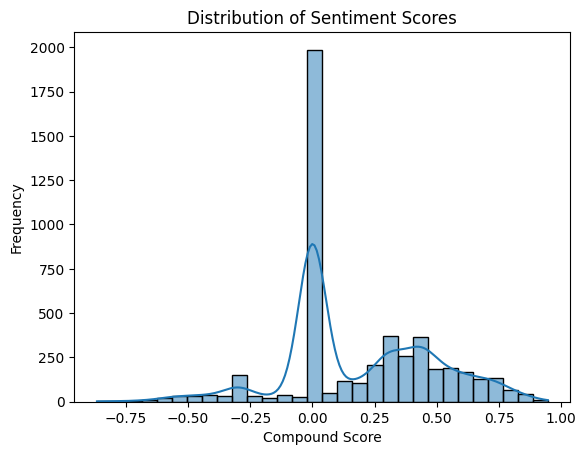

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# the sentiment distribution
sns.histplot(df['VADER_compound'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Score")
plt.ylabel("Frequency")
plt.show()

The chart shows how the sentiment scores (the mood scores) from the news headlines are spread out


